In [2]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
full_data = duckdb.read_csv('training_data_source.csv').df()
data = full_data.sample(frac=0.1)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

## Boxplot Analysis

Text(0.5, 0.98, 'Feature distribution for IP addresses with and without attacks')

<Figure size 500x300 with 0 Axes>

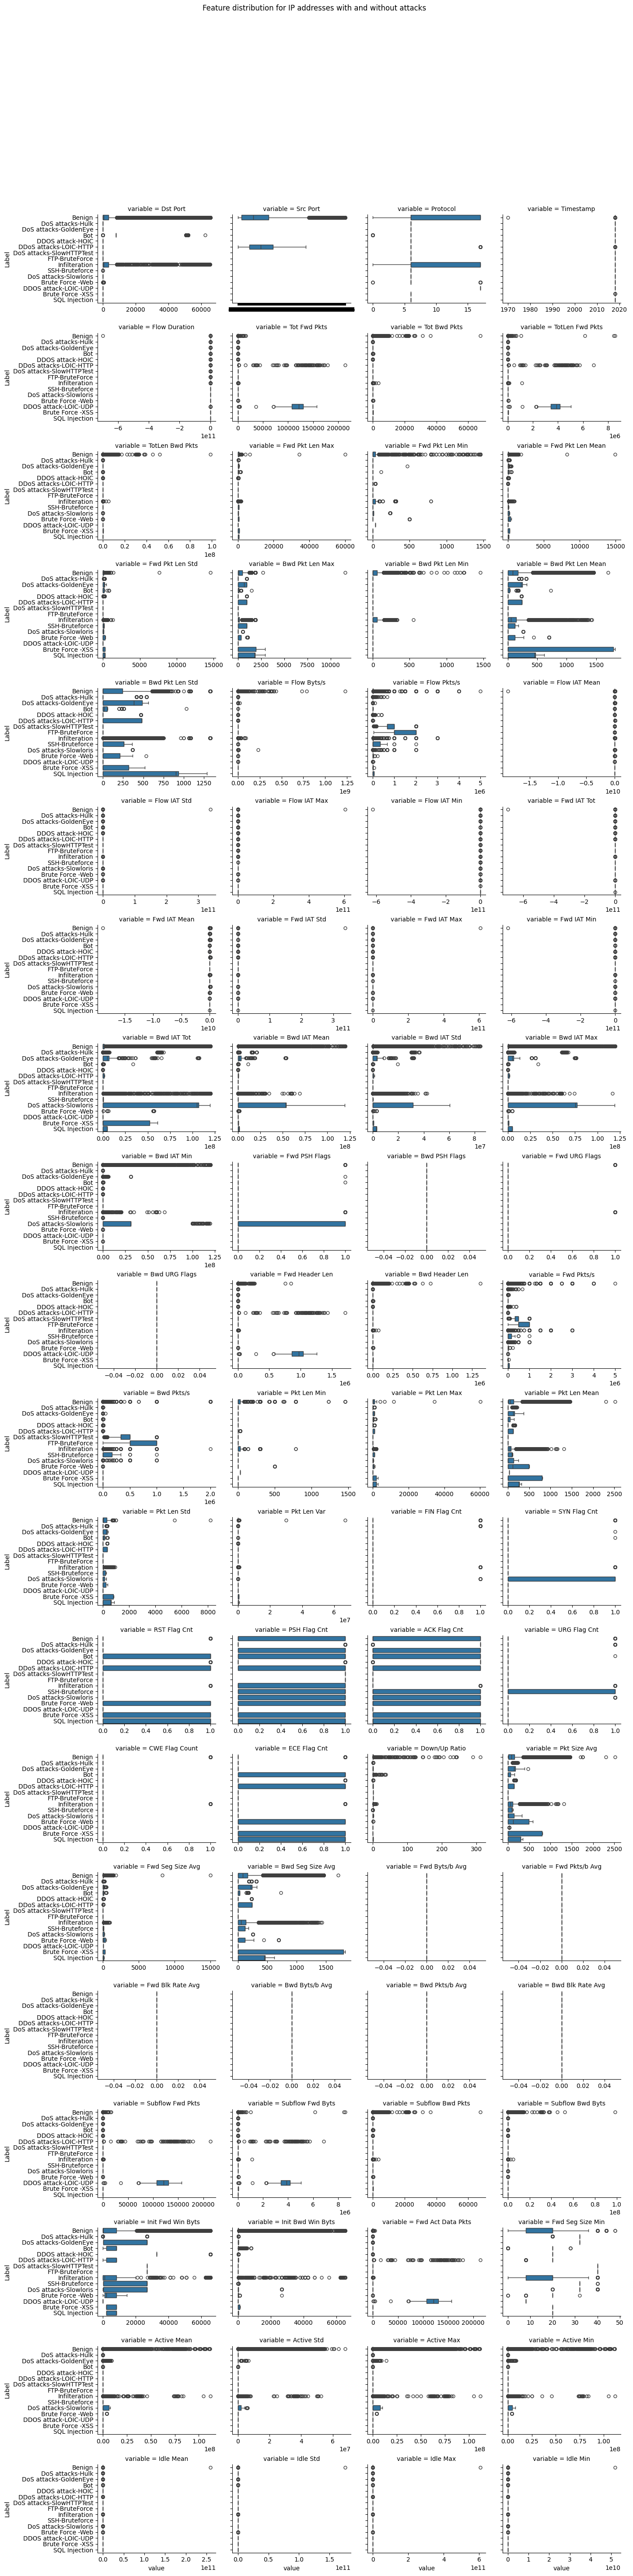

In [12]:
plt.figure(figsize=(5, 3))
# pivot columns to longer format
bots_data_melt = data.melt(id_vars=['Label'], value_vars=[
    "Dst Port",
    "Src Port",
    "Protocol",
    "Timestamp",
    "Flow Duration",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "TotLen Fwd Pkts",
    "TotLen Bwd Pkts",
    "Fwd Pkt Len Max",
    "Fwd Pkt Len Min",
    "Fwd Pkt Len Mean",
    "Fwd Pkt Len Std",
    "Bwd Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Mean",
    "Bwd Pkt Len Std",
    "Flow Byts/s",
    "Flow Pkts/s",
    "Flow IAT Mean",
    "Flow IAT Std",
    "Flow IAT Max",
    "Flow IAT Min",
    "Fwd IAT Tot",
    "Fwd IAT Mean",
    "Fwd IAT Std",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Bwd IAT Tot",
    "Bwd IAT Mean",
    "Bwd IAT Std",
    "Bwd IAT Max",
    "Bwd IAT Min",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "Fwd Header Len",
    "Bwd Header Len",
    "Fwd Pkts/s",
    "Bwd Pkts/s",
    "Pkt Len Min",
    "Pkt Len Max",
    "Pkt Len Mean",
    "Pkt Len Std",
    "Pkt Len Var",
    "FIN Flag Cnt",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "ACK Flag Cnt",
    "URG Flag Cnt",
    "CWE Flag Count",
    "ECE Flag Cnt",
    "Down/Up Ratio",
    "Pkt Size Avg",
    "Fwd Seg Size Avg",
    "Bwd Seg Size Avg",
    "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg",
    "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg",
    "Bwd Pkts/b Avg",
    "Bwd Blk Rate Avg",
    "Subflow Fwd Pkts",
    "Subflow Fwd Byts",
    "Subflow Bwd Pkts",
    "Subflow Bwd Byts",
    "Init Fwd Win Byts",
    "Init Bwd Win Byts",
    "Fwd Act Data Pkts",
    "Fwd Seg Size Min",
    "Active Mean",
    "Active Std",
    "Active Max",
    "Active Min",
    "Idle Mean",
    "Idle Std",
    "Idle Max",
    "Idle Min",
])

sns.catplot(
    data=bots_data_melt,
    y='Label',
    x='value',
    kind='box',
    col='variable',
    orient='h',
    col_wrap=4,
    sharey=True,
    sharex=False,
    height=3,
    aspect=1.2,
    margin_titles=True,
)

# add title on top of facet grid
plt.subplots_adjust(top=0.9)
plt.suptitle('Feature distribution for IP addresses with and without attacks')

## Principal Component Analysis

Correlation matrix:
                      PC1           PC2  Is Attack?
PC1         1.000000e+00 -2.080827e-15    0.002638
PC2        -2.080827e-15  1.000000e+00   -0.004058
Is Attack?  2.637645e-03 -4.057736e-03    1.000000


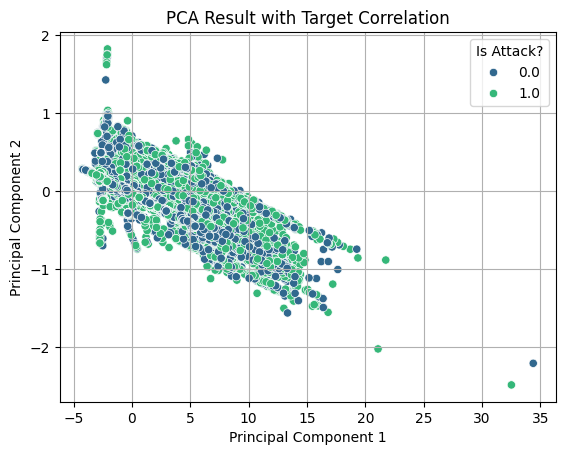


Important features for PC1:
 Pkt Len Std         0.970611
Pkt Len Max         0.965135
Bwd Pkt Len Std     0.925337
Bwd Pkt Len Max     0.917291
Pkt Len Var         0.888362
                      ...   
Bwd Pkts/b Avg      0.000000
Fwd Pkts/b Avg      0.000000
Fwd Byts/b Avg      0.000000
Bwd Byts/b Avg      0.000000
Fwd Blk Rate Avg    0.000000
Name: PC1, Length: 77, dtype: float64

Important features for PC2:
 Flow IAT Min        0.996584
Fwd IAT Min         0.996583
Fwd IAT Std         0.996554
Flow IAT Std        0.996496
Idle Std            0.996339
                      ...   
Bwd Pkts/b Avg      0.000000
Fwd Pkts/b Avg      0.000000
Fwd Byts/b Avg      0.000000
Bwd Byts/b Avg      0.000000
Fwd Blk Rate Avg    0.000000
Name: PC2, Length: 77, dtype: float64


In [13]:
# perform PCA on the data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = [
    "Protocol",
    "Flow Duration",
    "Tot Fwd Pkts",
    "Tot Bwd Pkts",
    "TotLen Fwd Pkts",
    "TotLen Bwd Pkts",
    "Fwd Pkt Len Max",
    "Fwd Pkt Len Min",
    "Fwd Pkt Len Mean",
    "Fwd Pkt Len Std",
    "Bwd Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Mean",
    "Bwd Pkt Len Std",
    "Flow Byts/s",
    "Flow Pkts/s",
    "Flow IAT Mean",
    "Flow IAT Std",
    "Flow IAT Max",
    "Flow IAT Min",
    "Fwd IAT Tot",
    "Fwd IAT Mean",
    "Fwd IAT Std",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Bwd IAT Tot",
    "Bwd IAT Mean",
    "Bwd IAT Std",
    "Bwd IAT Max",
    "Bwd IAT Min",
    "Fwd PSH Flags",
    "Bwd PSH Flags",
    "Fwd URG Flags",
    "Bwd URG Flags",
    "Fwd Header Len",
    "Bwd Header Len",
    "Fwd Pkts/s",
    "Bwd Pkts/s",
    "Pkt Len Min",
    "Pkt Len Max",
    "Pkt Len Mean",
    "Pkt Len Std",
    "Pkt Len Var",
    "FIN Flag Cnt",
    "SYN Flag Cnt",
    "RST Flag Cnt",
    "PSH Flag Cnt",
    "ACK Flag Cnt",
    "URG Flag Cnt",
    "CWE Flag Count",
    "ECE Flag Cnt",
    "Down/Up Ratio",
    "Pkt Size Avg",
    "Fwd Seg Size Avg",
    "Bwd Seg Size Avg",
    "Fwd Byts/b Avg",
    "Fwd Pkts/b Avg",
    "Fwd Blk Rate Avg",
    "Bwd Byts/b Avg",
    "Bwd Pkts/b Avg",
    "Bwd Blk Rate Avg",
    "Subflow Fwd Pkts",
    "Subflow Fwd Byts",
    "Subflow Bwd Pkts",
    "Subflow Bwd Byts",
    "Init Fwd Win Byts",
    "Init Bwd Win Byts",
    "Fwd Act Data Pkts",
    "Fwd Seg Size Min",
    "Active Mean",
    "Active Std",
    "Active Max",
    "Active Min",
    "Idle Mean",
    "Idle Std",
    "Idle Max",
    "Idle Min",
]

X = data[features]

# remove NaN values and corresponding rows in full_data['is_attack']
X = X.dropna()
y = full_data.loc[X.index, "Label"]

# map "Label" to binary values
y = y.map(lambda x: 0 if x == "Benign" else 1)

# remove infinite values from x
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Is Attack?"] = y

# get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=X.columns)

# correlate PCA components with attack_type
correlation = pca_df.corr()
print("Correlation matrix:\n", correlation)

sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Is Attack?", palette="viridis")
plt.title("PCA Result with Target Correlation")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

# Identify important features based on loadings
important_features_pc1 = loading_df["PC1"].abs().sort_values(ascending=False)
important_features_pc2 = loading_df["PC2"].abs().sort_values(ascending=False)

print("\nImportant features for PC1:\n", important_features_pc1)
print("\nImportant features for PC2:\n", important_features_pc2)